## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import MSELoss, BCELoss
from pylamp.utils.data import DataGenerator as dg 

## Training on Regression task

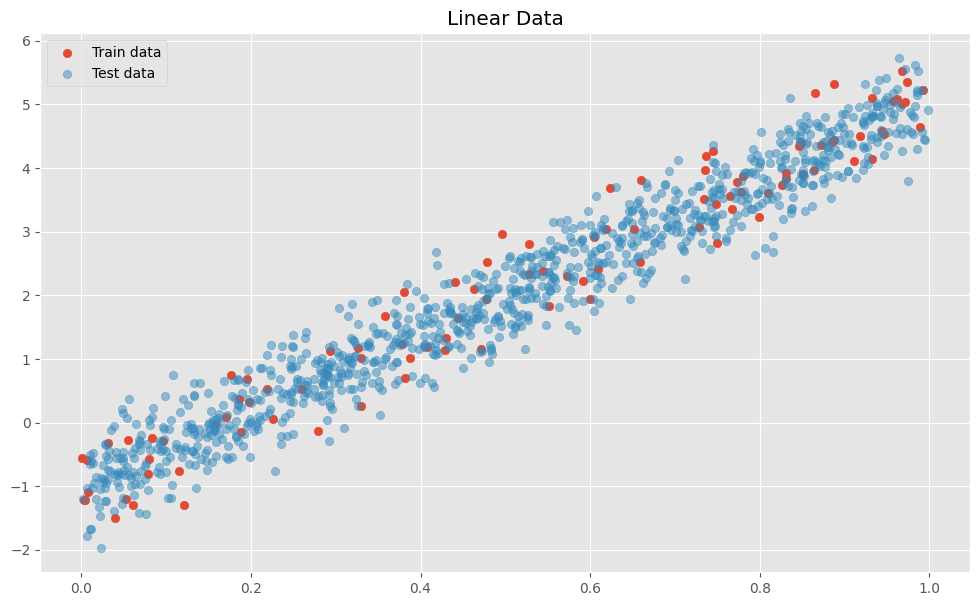

In [3]:
X_train, X_test,y_train,y_test  = dg.generate_linear_data()
dg.plot_linear_data(X_train, y_train, X_test, y_test, title='Linear Data', alpha_train=1, alpha_test=0.5)

**Model, loss and optimizer**

In [4]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = MSELoss()
train_loss, val_loss = SGD.step(
    model, loss, X_train=X_train, y_train=y_train, 
    epochs=100, lr=1e-2, batch_size=10, verbose=True,
)

input_size: 1, output_size: 1
Epoch 0 : Train loss : 9.91705923676301 - Val loss : None
Epoch 10 : Train loss : 1.622150150718894 - Val loss : None
Epoch 20 : Train loss : 1.2394740093441803 - Val loss : None
Epoch 30 : Train loss : 0.9646682478617892 - Val loss : None
Epoch 40 : Train loss : 0.7610049630798106 - Val loss : None
Epoch 50 : Train loss : 0.6108997653054227 - Val loss : None
Epoch 60 : Train loss : 0.5003248863098222 - Val loss : None
Epoch 70 : Train loss : 0.418874079145131 - Val loss : None
Epoch 80 : Train loss : 0.35887723025734986 - Val loss : None
Epoch 90 : Train loss : 0.31468394895496843 - Val loss : None
Model updated 1000 times.


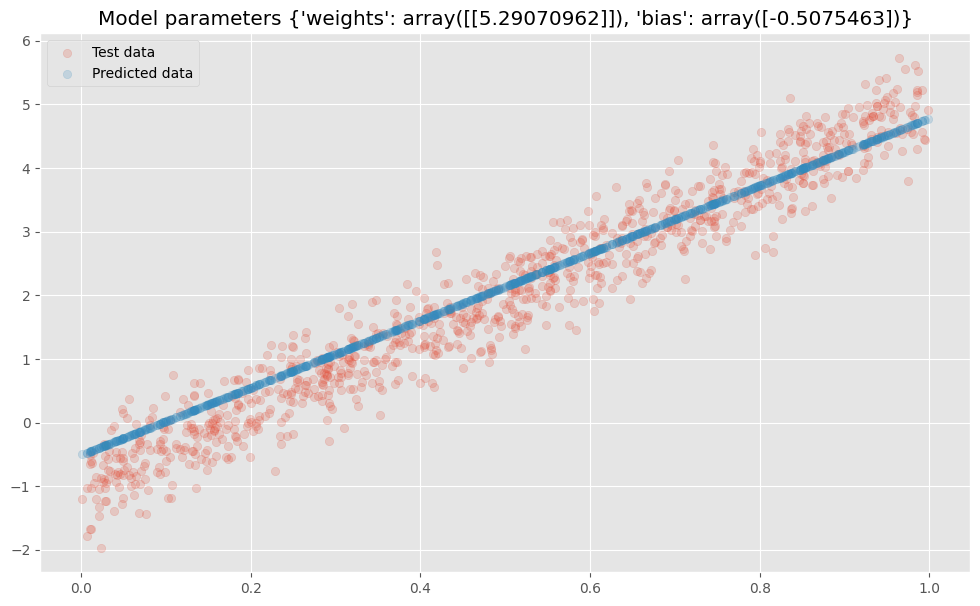

In [5]:
output = model.forward(X_test.reshape(-1,1))
title = f"Model parameters {model._parameters}"
dg.plot_linear_data(X_test, y_test, X_test, output, title_train="Test data",title_test="Predicted data", title=title)

## Training on Classification Task

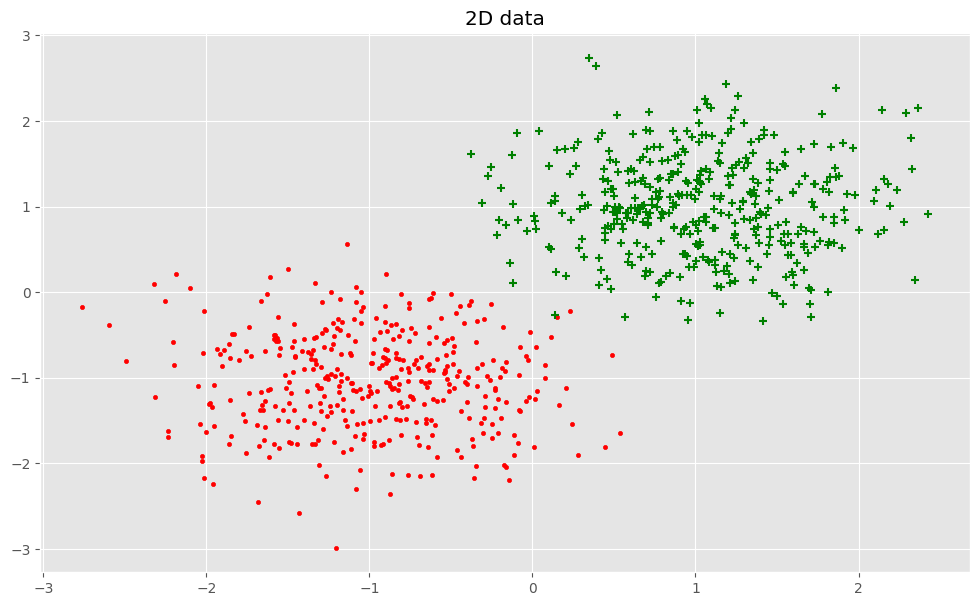

In [6]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=0, epsilon=0.5)
dg.plot_2D_data(X_train, y_train)

**Model, loss and optimizer**

In [7]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = BCELoss()
train_loss, val_loss = SGD.step(
    model, loss, X_train=X_train, y_train=y_train, 
    epochs=100, lr=1e-3, batch_size=10, verbose=True,
)

input_size: 2, output_size: 1
Epoch 0 : Train loss : 1.9486205352570458 - Val loss : None
Epoch 10 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 20 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 30 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 40 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 50 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 60 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 70 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 80 : Train loss : 0.46051701859880917 - Val loss : None
Epoch 90 : Train loss : 0.46051701859880917 - Val loss : None
Model updated 8000 times.


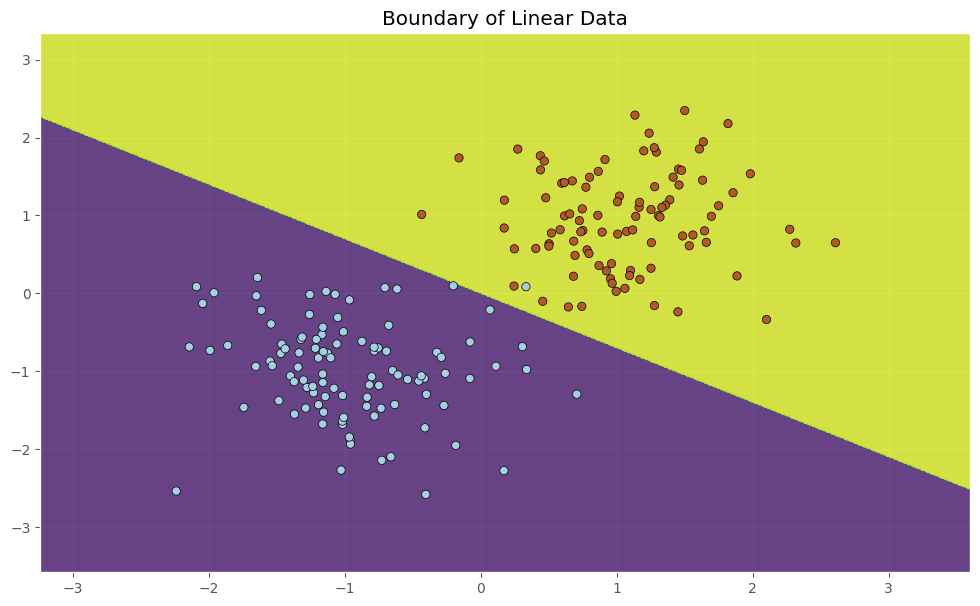

In [8]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")